In [1]:
from ase.visualize import view
from ase.spacegroup import crystal
from ase import Atoms
from ase.calculators.vasp import Vasp
from ase.calculators.emt import EMT
from ase.constraints import FixAtoms
from ase.optimize import BFGS, QuasiNewton
from ase.build import hcp0001
from ase.io import write,read
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from ase.lattice.cubic import FaceCenteredCubic
from ase.build import fcc111, fcc211, add_adsorbate, fcc111_root
import ase.io as io
from ase.build import cut
import surfaces_with_termination as st
import ase
from ase.calculators.espresso import Espresso
import trigonal as tri
import numpy 

# Creating Sb2Te3 unit cell

<AxesSubplot:>

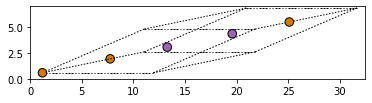

In [2]:
Sb2Te3=ase.io.read("Sb2Te3_mp-1201_primitive.cif")
fig, ax = plt.subplots()
plot_atoms(Sb2Te3, ax, radii=0.3, rotation=('0x,0y,0z'))

# Selecting Te-terminated surface, 3 QL 

In [3]:
termin=st.translate_lattice(Sb2Te3, (1,1,1), tol=0.001)

# Creating 111 cut

In [4]:
Sb2Te3111 = ase.build.surface(termin[6], (1,1,1), 4)

# Generating Pb wetting layer with $\sqrt(3)$R-30 distortion

In [74]:
a_Te=4.333
a_Pb=numpy.sqrt(3)*0.5*a_Te
Pb_num=2

In [75]:
#Te_surface = numpy.array( tri.triangular_lattice(a_Te, expansion_level = 30,starting_point = (0, 0)) ); # returns a list with points on the Euclidean plane (2d space)
wetting = numpy.array( tri.triangular_lattice(a_Pb, expansion_level =Pb_num,starting_point = (0,0)) ) # returns a list with points on the Euclidean plane (2d space)

1
(-5.628732111896959, 3.2497499999999997)


# Appending Z column to above generated (x,y) position array

In [76]:
z_wetting=numpy.zeros(wetting.shape[0])
z_wetting=numpy.transpose(z_wetting)
wl=numpy.c_[wetting,z_wetting]

# Generating Pb layer using Atoms function of ASE

In [77]:
Pb_n_atom1='Pb'+ str(wetting.shape[0]) 
Pb_wl = Atoms(Pb_n_atom1,wl)

## Rotating Pb layer by 30 degrees

In [78]:
Pb_wl.rotate(30, 'z')

## Adding Pb WL to the substrate

In [79]:
sub=Sb2Te3111*(6,6,1)
add_adsorbate(sub, Pb_wl, 3.0, (23.716,15.134))
sub.center(vacuum=20.0, axis=2)
view(sub)

In [73]:
# sub=Sb2Te3111*(18,18,1)
# add_adsorbate(sub, Pb_wl, 3.0, (65.961,39.524))
# sub.center(vacuum=20.0, axis=2)
# view(sub)

<AxesSubplot:>

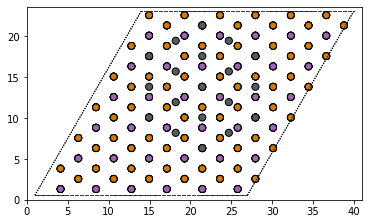

In [80]:
fig, ax = plt.subplots()
plot_atoms(sub, ax, radii=0.3, rotation=('0x,0y,0z'))